In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

import re
import nltk
import math
import pickle

%matplotlib inline

## Univariate and Bivariate Analysis: Understanding the Target Variable


### Objective:

### - Explore the target variable to check for missing and unique values.
### - Establish the feature importance of both categorical and numerical variables with regard to the target variable.

### Load the data as a csv file

In [2]:
# data downloaded from kaggle https://www.kaggle.com/jsphyg/weather-dataset-rattle-package
df_weather = pd.read_csv('weatherAUS.csv')

In [3]:
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df_weather.shape

(145460, 23)

In [5]:
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df_weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Drop the 'RainToday' column from the dataframe: Most likely the project will involve predicting if it rains tomorrow rather than today

In [8]:
df_weather.drop(['RainToday'], axis=1,inplace=True)

### 1. find out whether the target variable (“Rain_Tomorrow”) is categorical or numerical.

In [9]:
df_weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow      object
dtype: object

In [10]:
# convert 'RainTomorrow' from object to category data type
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].astype('category')

In [11]:
df_weather.dtypes

Date               object
Location           object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir        object
WindGustSpeed     float64
WindDir9am         object
WindDir3pm         object
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainTomorrow     category
dtype: object

In [12]:
df_weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


### 2. Find out the number of missing values in the target variable.

###  Locate Nan Values in weather data

In [13]:
df_weather.columns[df_weather.isna().any()].tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow']

In [14]:
# count the Nan values for each column in dataframe
df_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainTomorrow      3267
dtype: int64

### There are a lot on Nan values in almost all the columns: How to deal with this issue?

### 3. Analyze the labels in the target variable, RainTomorrow

In [15]:
# determne the unique values in target variable,'RainTomorrow'
print(df_weather['RainTomorrow'].unique().tolist())

['No', 'Yes', nan]


In [16]:
# Get the frequency distribution of values
counts = df_weather['RainTomorrow'].value_counts().to_dict()
print(counts)

{'No': 110316, 'Yes': 31877}


In [17]:
# Evaluate the percentage of the frequency distribution for each label.
relative_frequencies = df_weather['RainTomorrow'].value_counts(normalize=True)
print(relative_frequencies)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64


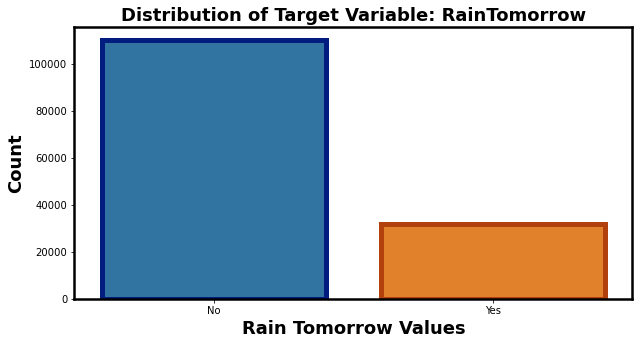

In [18]:
# Visualize the distribution using the seaborn countplot.
fig, ax = plt.subplots(figsize=(10, 5))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
plt.title('Distribution of Target Variable: RainTomorrow',fontsize=18,fontweight='bold')
plt.xlabel('Rain Tomorrow Values',fontsize=18,fontweight='bold')
plt.ylabel('Count',fontsize=18,fontweight='bold')

ax = sns.countplot(x='RainTomorrow', data= df_weather,linewidth=5,edgecolor=sns.color_palette("dark", 3))
ax.set( xlabel = "Rain Tomorrow Values", ylabel = "Count")
plt.show()

### 4. Convert  yes/no labels to integers 1/0 to make calculations easier.

In [19]:
# Before converting to integers
df_weather.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [20]:
#df_weather.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True) 
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [21]:
# After converting to integers
df_weather.RainTomorrow.value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

### 5. Create Month, Day, Year columns for dataframe

In [22]:
# Covert 'Date' column to a datetime object
df_weather['Date'] = df_weather['Date'].astype('datetime64')

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [23]:
df_weather.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainTomorrow            float64
dtype: object

In [24]:
df_weather['month'] = df_weather.Date.dt.month

In [25]:
df_weather['day'] = df_weather.Date.dt.day

In [26]:
df_weather['year'] = df_weather.Date.dt.year

In [27]:
# sanity check on new day, month, year columns in dataframe
df_weather[['Date','year','month','day']].tail(10)

,Date,year,month,day
145450,2017-06-16,2017,6,16
145451,2017-06-17,2017,6,17
145452,2017-06-18,2017,6,18
145453,2017-06-19,2017,6,19
145454,2017-06-20,2017,6,20
145455,2017-06-21,2017,6,21
145456,2017-06-22,2017,6,22
145457,2017-06-23,2017,6,23
145458,2017-06-24,2017,6,24
145459,2017-06-25,2017,6,25


### Drop original 'Date' column from dataframe

In [28]:
df_weather.drop(['Date'], axis=1,inplace=True)

In [29]:
df_weather.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow     float64
month              int64
day                int64
year               int64
dtype: object

In [30]:
df_weather.RainTomorrow.value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

In [31]:
df_weather.month.value_counts()

3     13361
5     13353
1     13236
6     12684
10    12028
8     12028
7     12025
11    11669
9     11640
4     11550
12    11093
2     10793
Name: month, dtype: int64

In [32]:
df_weather.Location.value_counts()

Canberra            3436
Sydney              3344
Perth               3193
Darwin              3193
Melbourne           3193
Brisbane            3193
Hobart              3193
Adelaide            3193
Albany              3040
AliceSprings        3040
Ballarat            3040
Albury              3040
MountGambier        3040
Cairns              3040
Wollongong          3040
Launceston          3040
GoldCoast           3040
Townsville          3040
Bendigo             3040
MountGinini         3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Dartmoor            3009
Mildura             3009
Williamtown         3009
Portland            3009
SydneyAirport       3009
PerthAirport        3009
Richmond            3009
NorfolkIsland       3009
Moree               3009
BadgerysCreek       3009
WaggaWagga          3009
Cobar               3009
Nuriootpa           3009
Woomera             3009
PearceRAAF          3009
MelbourneAirport    3009
Watsonia            3009


In [33]:
df_weather.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow     float64
month              int64
day                int64
year               int64
dtype: object

### 6. Evaluate the feature importance for shortlisted variables: 

### Correlation of Numerical features

In [34]:
df_weather.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,month,day,year
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906,0.083936,-0.203833,0.002359,0.043263
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503,-0.159237,-0.163884,0.000611,0.062044
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657,0.239032,-0.031371,0.001712,-0.008956
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893,-0.119285,-0.026805,-0.006051,0.084344
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501,-0.450768,0.024327,-0.000397,0.008788
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748,0.234010,0.061026,-0.009063,-0.030572
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569,0.090995,0.051277,-0.008786,-0.018440
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778,0.087817,0.060373,-0.009943,-0.029775
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399,0.257161,-0.090759,0.015166,0.009846
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841,0.446160,-0.018858,0.013013,-0.009662


## Heatmap of Correlation of Data Features

In [35]:
df_weather.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,month,day,year
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906,0.083936,-0.203833,0.002359,0.043263
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503,-0.159237,-0.163884,0.000611,0.062044
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657,0.239032,-0.031371,0.001712,-0.008956
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893,-0.119285,-0.026805,-0.006051,0.084344
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501,-0.450768,0.024327,-0.000397,0.008788
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748,0.234010,0.061026,-0.009063,-0.030572
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569,0.090995,0.051277,-0.008786,-0.018440
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778,0.087817,0.060373,-0.009943,-0.029775
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399,0.257161,-0.090759,0.015166,0.009846
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841,0.446160,-0.018858,0.013013,-0.009662


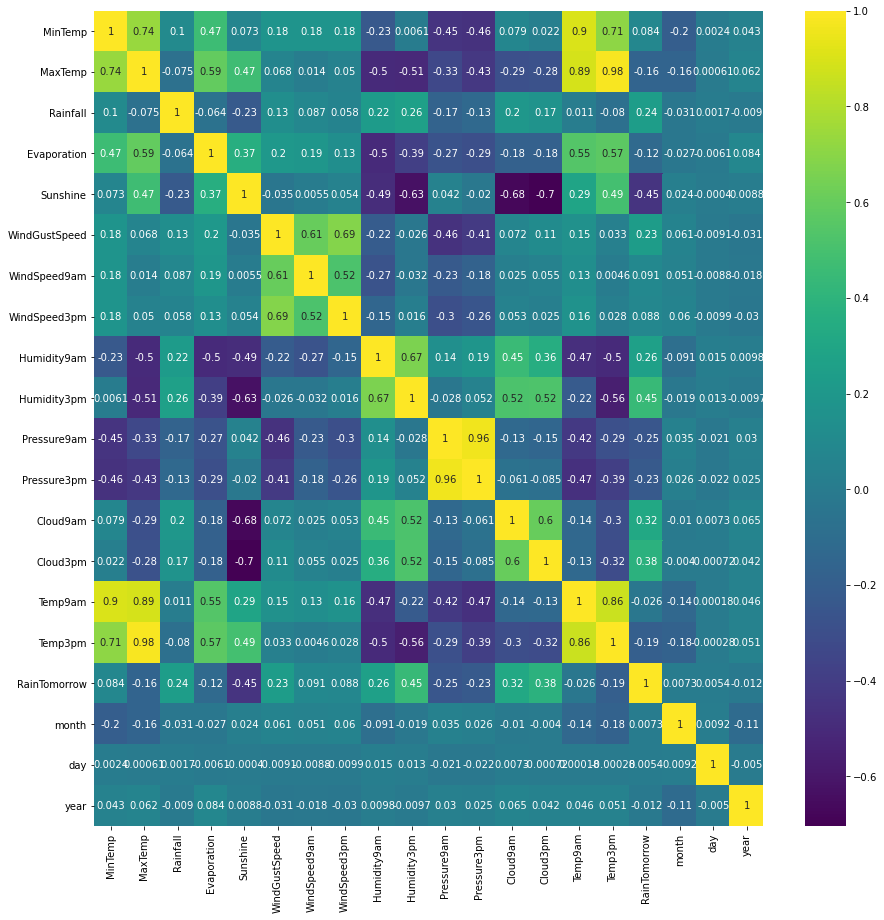

In [36]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_weather.corr(),annot = True, cmap = 'viridis')
plt.show()